### Disclaimer: While case study is real, data is modified for educational purposes. 

Dataset: google-data.csv

Description: This dataset represents the Stock Price of Google incorporation between 2013-2018 
years. <br>

The data is presented in csv format as follows: Date, Open, High, Low, Close, Volume, Adj Close. 

### Task: You are asked to create a model using Facebook Prophet predict closing stock prices for the next 100 days. Tune the hyperparameters using Bayesian Optimization.

In [5]:
import pandas as pd
from prophet import Prophet
from hyperopt import fmin, tpe, hp
import matplotlib.pyplot as plt
import copy

In [6]:
data = pd.read_csv('google-data.csv')

df = copy.deepcopy(data)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')

df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

df.columns

Index(['ds', 'Open', 'High', 'Low', 'y', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.isna().sum()

ds           0
Open         0
High         0
Low          0
y            0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   y          1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 78.7 KB


In [10]:
df.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
y                   float64
Adj Close           float64
Volume                int64
dtype: object

In [11]:
model = Prophet()
model.fit(df)

# Hyperparameter Tuning with Bayesian Optimization
space = {
    'changepoint_prior_scale': hp.uniform('changepoint_prior_scale', 0.001, 0.5),
    'seasonality_prior_scale': hp.uniform('seasonality_prior_scale', 0.01, 10),
    'holidays_prior_scale': hp.uniform('holidays_prior_scale', 0.01, 10),
}

def objective(params):
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        holidays_prior_scale=params['holidays_prior_scale']
    )
    model.fit(df)
    
    rmse = 0.0
    
    return rmse

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50)

21:55:32 - cmdstanpy - INFO - Chain [1] start processing
21:55:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

21:55:33 - cmdstanpy - INFO - Chain [1] start processing
21:55:34 - cmdstanpy - INFO - Chain [1] done processing


  2%|▏         | 1/50 [00:01<00:52,  1.08s/trial, best loss: 0.0]

21:55:34 - cmdstanpy - INFO - Chain [1] start processing
21:55:34 - cmdstanpy - INFO - Chain [1] done processing


  4%|▍         | 2/50 [00:01<00:43,  1.11trial/s, best loss: 0.0]

21:55:35 - cmdstanpy - INFO - Chain [1] start processing
21:55:36 - cmdstanpy - INFO - Chain [1] done processing


  6%|▌         | 3/50 [00:03<01:01,  1.30s/trial, best loss: 0.0]

21:55:36 - cmdstanpy - INFO - Chain [1] start processing
21:55:38 - cmdstanpy - INFO - Chain [1] done processing


  8%|▊         | 4/50 [00:05<01:08,  1.48s/trial, best loss: 0.0]

21:55:38 - cmdstanpy - INFO - Chain [1] start processing
21:55:39 - cmdstanpy - INFO - Chain [1] done processing


 10%|█         | 5/50 [00:06<01:08,  1.53s/trial, best loss: 0.0]

21:55:40 - cmdstanpy - INFO - Chain [1] start processing
21:55:41 - cmdstanpy - INFO - Chain [1] done processing


 12%|█▏        | 6/50 [00:08<01:08,  1.55s/trial, best loss: 0.0]

21:55:42 - cmdstanpy - INFO - Chain [1] start processing
21:55:43 - cmdstanpy - INFO - Chain [1] done processing


 14%|█▍        | 7/50 [00:10<01:13,  1.70s/trial, best loss: 0.0]

21:55:43 - cmdstanpy - INFO - Chain [1] start processing
21:55:44 - cmdstanpy - INFO - Chain [1] done processing


 16%|█▌        | 8/50 [00:11<01:02,  1.48s/trial, best loss: 0.0]

21:55:44 - cmdstanpy - INFO - Chain [1] start processing
21:55:45 - cmdstanpy - INFO - Chain [1] done processing


 18%|█▊        | 9/50 [00:12<00:50,  1.23s/trial, best loss: 0.0]

21:55:45 - cmdstanpy - INFO - Chain [1] start processing
21:55:47 - cmdstanpy - INFO - Chain [1] done processing


 20%|██        | 10/50 [00:14<01:06,  1.65s/trial, best loss: 0.0]

21:55:48 - cmdstanpy - INFO - Chain [1] start processing
21:55:48 - cmdstanpy - INFO - Chain [1] done processing


 22%|██▏       | 11/50 [00:16<01:00,  1.56s/trial, best loss: 0.0]

21:55:49 - cmdstanpy - INFO - Chain [1] start processing
21:55:50 - cmdstanpy - INFO - Chain [1] done processing


 24%|██▍       | 12/50 [00:17<00:51,  1.35s/trial, best loss: 0.0]

21:55:50 - cmdstanpy - INFO - Chain [1] start processing
21:55:51 - cmdstanpy - INFO - Chain [1] done processing


 26%|██▌       | 13/50 [00:18<00:48,  1.31s/trial, best loss: 0.0]

21:55:51 - cmdstanpy - INFO - Chain [1] start processing
21:55:52 - cmdstanpy - INFO - Chain [1] done processing


 28%|██▊       | 14/50 [00:19<00:42,  1.18s/trial, best loss: 0.0]

21:55:53 - cmdstanpy - INFO - Chain [1] start processing
21:55:53 - cmdstanpy - INFO - Chain [1] done processing


 30%|███       | 15/50 [00:20<00:46,  1.34s/trial, best loss: 0.0]

21:55:54 - cmdstanpy - INFO - Chain [1] start processing
21:55:55 - cmdstanpy - INFO - Chain [1] done processing


 32%|███▏      | 16/50 [00:22<00:49,  1.44s/trial, best loss: 0.0]

21:55:55 - cmdstanpy - INFO - Chain [1] start processing
21:55:57 - cmdstanpy - INFO - Chain [1] done processing


 34%|███▍      | 17/50 [00:24<00:52,  1.58s/trial, best loss: 0.0]

21:55:57 - cmdstanpy - INFO - Chain [1] start processing
21:55:58 - cmdstanpy - INFO - Chain [1] done processing


 36%|███▌      | 18/50 [00:25<00:47,  1.47s/trial, best loss: 0.0]

21:55:59 - cmdstanpy - INFO - Chain [1] start processing
21:55:59 - cmdstanpy - INFO - Chain [1] done processing


 38%|███▊      | 19/50 [00:26<00:43,  1.41s/trial, best loss: 0.0]

21:56:00 - cmdstanpy - INFO - Chain [1] start processing
21:56:00 - cmdstanpy - INFO - Chain [1] done processing


 40%|████      | 20/50 [00:28<00:39,  1.31s/trial, best loss: 0.0]

21:56:02 - cmdstanpy - INFO - Chain [1] start processing
21:56:03 - cmdstanpy - INFO - Chain [1] done processing


 42%|████▏     | 21/50 [00:30<00:46,  1.60s/trial, best loss: 0.0]

21:56:03 - cmdstanpy - INFO - Chain [1] start processing
21:56:05 - cmdstanpy - INFO - Chain [1] done processing


 44%|████▍     | 22/50 [00:32<00:47,  1.68s/trial, best loss: 0.0]

21:56:05 - cmdstanpy - INFO - Chain [1] start processing
21:56:06 - cmdstanpy - INFO - Chain [1] done processing


 46%|████▌     | 23/50 [00:33<00:38,  1.44s/trial, best loss: 0.0]

21:56:06 - cmdstanpy - INFO - Chain [1] start processing
21:56:06 - cmdstanpy - INFO - Chain [1] done processing


 48%|████▊     | 24/50 [00:33<00:33,  1.28s/trial, best loss: 0.0]

21:56:07 - cmdstanpy - INFO - Chain [1] start processing
21:56:07 - cmdstanpy - INFO - Chain [1] done processing


 50%|█████     | 25/50 [00:34<00:28,  1.13s/trial, best loss: 0.0]

21:56:08 - cmdstanpy - INFO - Chain [1] start processing
21:56:09 - cmdstanpy - INFO - Chain [1] done processing


 52%|█████▏    | 26/50 [00:36<00:32,  1.34s/trial, best loss: 0.0]

21:56:09 - cmdstanpy - INFO - Chain [1] start processing
21:56:10 - cmdstanpy - INFO - Chain [1] done processing


 54%|█████▍    | 27/50 [00:37<00:29,  1.28s/trial, best loss: 0.0]

21:56:11 - cmdstanpy - INFO - Chain [1] start processing
21:56:11 - cmdstanpy - INFO - Chain [1] done processing


 56%|█████▌    | 28/50 [00:38<00:25,  1.14s/trial, best loss: 0.0]

21:56:11 - cmdstanpy - INFO - Chain [1] start processing
21:56:12 - cmdstanpy - INFO - Chain [1] done processing


 58%|█████▊    | 29/50 [00:39<00:23,  1.10s/trial, best loss: 0.0]

21:56:13 - cmdstanpy - INFO - Chain [1] start processing
21:56:14 - cmdstanpy - INFO - Chain [1] done processing


 60%|██████    | 30/50 [00:41<00:26,  1.34s/trial, best loss: 0.0]

21:56:14 - cmdstanpy - INFO - Chain [1] start processing
21:56:15 - cmdstanpy - INFO - Chain [1] done processing


 62%|██████▏   | 31/50 [00:42<00:22,  1.18s/trial, best loss: 0.0]

21:56:15 - cmdstanpy - INFO - Chain [1] start processing
21:56:16 - cmdstanpy - INFO - Chain [1] done processing


 64%|██████▍   | 32/50 [00:43<00:20,  1.16s/trial, best loss: 0.0]

21:56:18 - cmdstanpy - INFO - Chain [1] start processing
21:56:19 - cmdstanpy - INFO - Chain [1] done processing


 66%|██████▌   | 33/50 [00:46<00:28,  1.65s/trial, best loss: 0.0]

21:56:19 - cmdstanpy - INFO - Chain [1] start processing
21:56:20 - cmdstanpy - INFO - Chain [1] done processing


 68%|██████▊   | 34/50 [00:47<00:24,  1.50s/trial, best loss: 0.0]

21:56:20 - cmdstanpy - INFO - Chain [1] start processing
21:56:21 - cmdstanpy - INFO - Chain [1] done processing


 70%|███████   | 35/50 [00:48<00:22,  1.48s/trial, best loss: 0.0]

21:56:22 - cmdstanpy - INFO - Chain [1] start processing
21:56:22 - cmdstanpy - INFO - Chain [1] done processing


 72%|███████▏  | 36/50 [00:49<00:18,  1.30s/trial, best loss: 0.0]

21:56:23 - cmdstanpy - INFO - Chain [1] start processing
21:56:24 - cmdstanpy - INFO - Chain [1] done processing


 74%|███████▍  | 37/50 [00:51<00:18,  1.45s/trial, best loss: 0.0]

21:56:24 - cmdstanpy - INFO - Chain [1] start processing
21:56:25 - cmdstanpy - INFO - Chain [1] done processing


 76%|███████▌  | 38/50 [00:52<00:14,  1.20s/trial, best loss: 0.0]

21:56:25 - cmdstanpy - INFO - Chain [1] start processing
21:56:25 - cmdstanpy - INFO - Chain [1] done processing


 78%|███████▊  | 39/50 [00:52<00:12,  1.10s/trial, best loss: 0.0]

21:56:26 - cmdstanpy - INFO - Chain [1] start processing
21:56:26 - cmdstanpy - INFO - Chain [1] done processing


 80%|████████  | 40/50 [00:53<00:10,  1.09s/trial, best loss: 0.0]

21:56:27 - cmdstanpy - INFO - Chain [1] start processing
21:56:28 - cmdstanpy - INFO - Chain [1] done processing


 82%|████████▏ | 41/50 [00:55<00:10,  1.17s/trial, best loss: 0.0]

21:56:28 - cmdstanpy - INFO - Chain [1] start processing
21:56:29 - cmdstanpy - INFO - Chain [1] done processing


 84%|████████▍ | 42/50 [00:56<00:09,  1.20s/trial, best loss: 0.0]

21:56:29 - cmdstanpy - INFO - Chain [1] start processing
21:56:30 - cmdstanpy - INFO - Chain [1] done processing


 86%|████████▌ | 43/50 [00:57<00:07,  1.13s/trial, best loss: 0.0]

21:56:30 - cmdstanpy - INFO - Chain [1] start processing
21:56:31 - cmdstanpy - INFO - Chain [1] done processing


 88%|████████▊ | 44/50 [00:58<00:06,  1.09s/trial, best loss: 0.0]

21:56:31 - cmdstanpy - INFO - Chain [1] start processing
21:56:32 - cmdstanpy - INFO - Chain [1] done processing


 90%|█████████ | 45/50 [00:59<00:05,  1.04s/trial, best loss: 0.0]

21:56:32 - cmdstanpy - INFO - Chain [1] start processing
21:56:34 - cmdstanpy - INFO - Chain [1] done processing


 92%|█████████▏| 46/50 [01:01<00:05,  1.36s/trial, best loss: 0.0]

21:56:35 - cmdstanpy - INFO - Chain [1] start processing
21:56:35 - cmdstanpy - INFO - Chain [1] done processing


 94%|█████████▍| 47/50 [01:02<00:03,  1.27s/trial, best loss: 0.0]

21:56:36 - cmdstanpy - INFO - Chain [1] start processing
21:56:37 - cmdstanpy - INFO - Chain [1] done processing


 96%|█████████▌| 48/50 [01:04<00:02,  1.37s/trial, best loss: 0.0]

21:56:37 - cmdstanpy - INFO - Chain [1] start processing
21:56:38 - cmdstanpy - INFO - Chain [1] done processing


 98%|█████████▊| 49/50 [01:05<00:01,  1.25s/trial, best loss: 0.0]

21:56:38 - cmdstanpy - INFO - Chain [1] start processing
21:56:39 - cmdstanpy - INFO - Chain [1] done processing


100%|██████████| 50/50 [01:06<00:00,  1.33s/trial, best loss: 0.0]


In [12]:
print("Best Hyperparameters:")
print(best)

Best Hyperparameters:
{'changepoint_prior_scale': 0.30423188650896804, 'holidays_prior_scale': 7.065974046973714, 'seasonality_prior_scale': 1.7375714368483623}


21:57:45 - cmdstanpy - INFO - Chain [1] start processing
21:57:47 - cmdstanpy - INFO - Chain [1] done processing


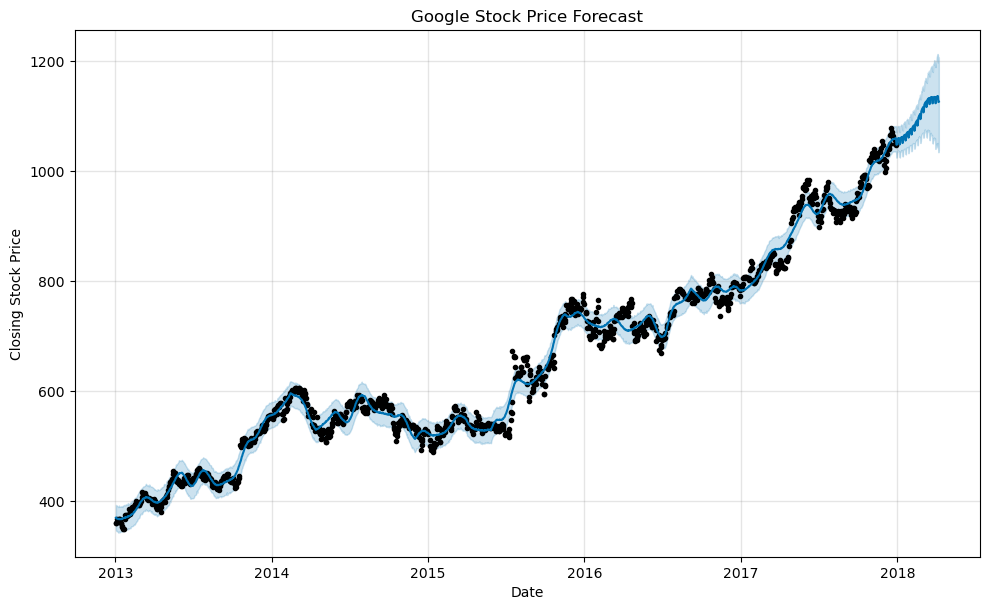

In [14]:
best_model = Prophet(
    changepoint_prior_scale=best['changepoint_prior_scale'],
    seasonality_prior_scale=best['seasonality_prior_scale'],
    holidays_prior_scale=best['holidays_prior_scale']
)
best_model.fit(df)

future = best_model.make_future_dataframe(periods=100)

forecast = best_model.predict(future)

fig = best_model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.title('Google Stock Price Forecast')

plt.show()